In [26]:

#ONLY FOR INDIVIDUAL DAYS

'''
from the chosen day, choose 1 particle trajectory based on the closest point from S15
get a new set of point S for just that trajectory
plot that trajectory
find the points in S that closest to a) S15 and b)S16
Show that in the graph
'''


from scipy.spatial import distance


import datetime as dt

import matplotlib as mat

import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import matplotlib.colorbar as mpl_colorbar

import netCDF4 as nc
import numpy as np
from salishsea_tools import geo_tools



import shutil

from salishsea_tools import viz_tools

from mpl_toolkits.axes_grid1 import make_axes_locatable


from matplotlib.backends.backend_agg import FigureCanvasAgg as fc



%matplotlib inline

#We have to edit:


days = ("JUL 19",)

plots = (1,) #directory position: from 1 to 5

date_0 = dt.datetime (year = 2016, month = 7, day = 19)




COL = 1

delta = 1/3 #hours. we get this from ariane

directory = "/home/gsgarbi/analysis-giorgio/project2/"


length = "5 days" #multiply trajectory length by ratio

tt = 5

#reference: 14 days

ratio = 5/14

total = int(delta**(-1) * 24 * tt)

size = 40

fontsize = 40

mat.rcParams.update({'font.size': fontsize})

tfs = 55 #title font














In [122]:
trajectories = []



initial_positions = []


trajectories1 =[]
init1 = []
for num in plots:
    trajectories1.append(np.loadtxt(directory+"run%s/traj.txt"%num, delimiter = ' '))
    init1.append(np.loadtxt(directory+"run%s/initial_positions.txt"%num))
    
    trajr = np.loadtxt(directory+"run%s/traj.txt"%num, delimiter = ' ')

myo = Traj (trajr)

smyo = myo.sub_traj(2)


In [126]:

class Traj:
    def __init__(self, traject, t0 = date_0, deltat = 20):
        
        self.deltat = deltat
        
        self.traj = traject
    
        self.points = [(x[1], x[2]) for x in self.traj]

        self.particles = [x[0] for x in self.traj]
        
        self.t0 = t0
        
    def closest_p(self, p2):
        
        closest_p = self.points[distance.cdist([p2], self.points).argmin()]
        
        return closest_p
    
    def find_particle (self,point):

        when = self.points.index(point)

        P = self.particles[when]
        
        return P
    
    def time (self, point, date = date_0):
        return date + dt.timedelta(minutes= self.deltat * self.points.index(point))
    
    def timec (self, point, date = date_0):
        return self.t0 + dt.timedelta(minutes= self.deltat * self.points.index(self.closest_p(point)))
    
    def sub_traj(self, particle):
        T = (i for i in self.traj if i[0] == particle)
        b= Traj(traject = T, t0 = self.t0, deltat = self.deltat)
        return b
    
# class Sub_Traj (Traj):
#     def __init__(self, traject, t0 = date_0, deltat = 20):
#         Traj.__init__(self, traject, t0 = date_0, deltat = 20)


        
#         traj.deltat = trajmae.deltat
        
        
    
#         self.points = [(x[1], x[2]) for x in traject]

#         self.particles = [x[0] for x in traject]
        
#         self.t0 = trajmae.t0
        
#         return Traj

    
# for i in range(1):
#     print (myo.points[i])
#     print (myo.sub_traj(2).points[i])




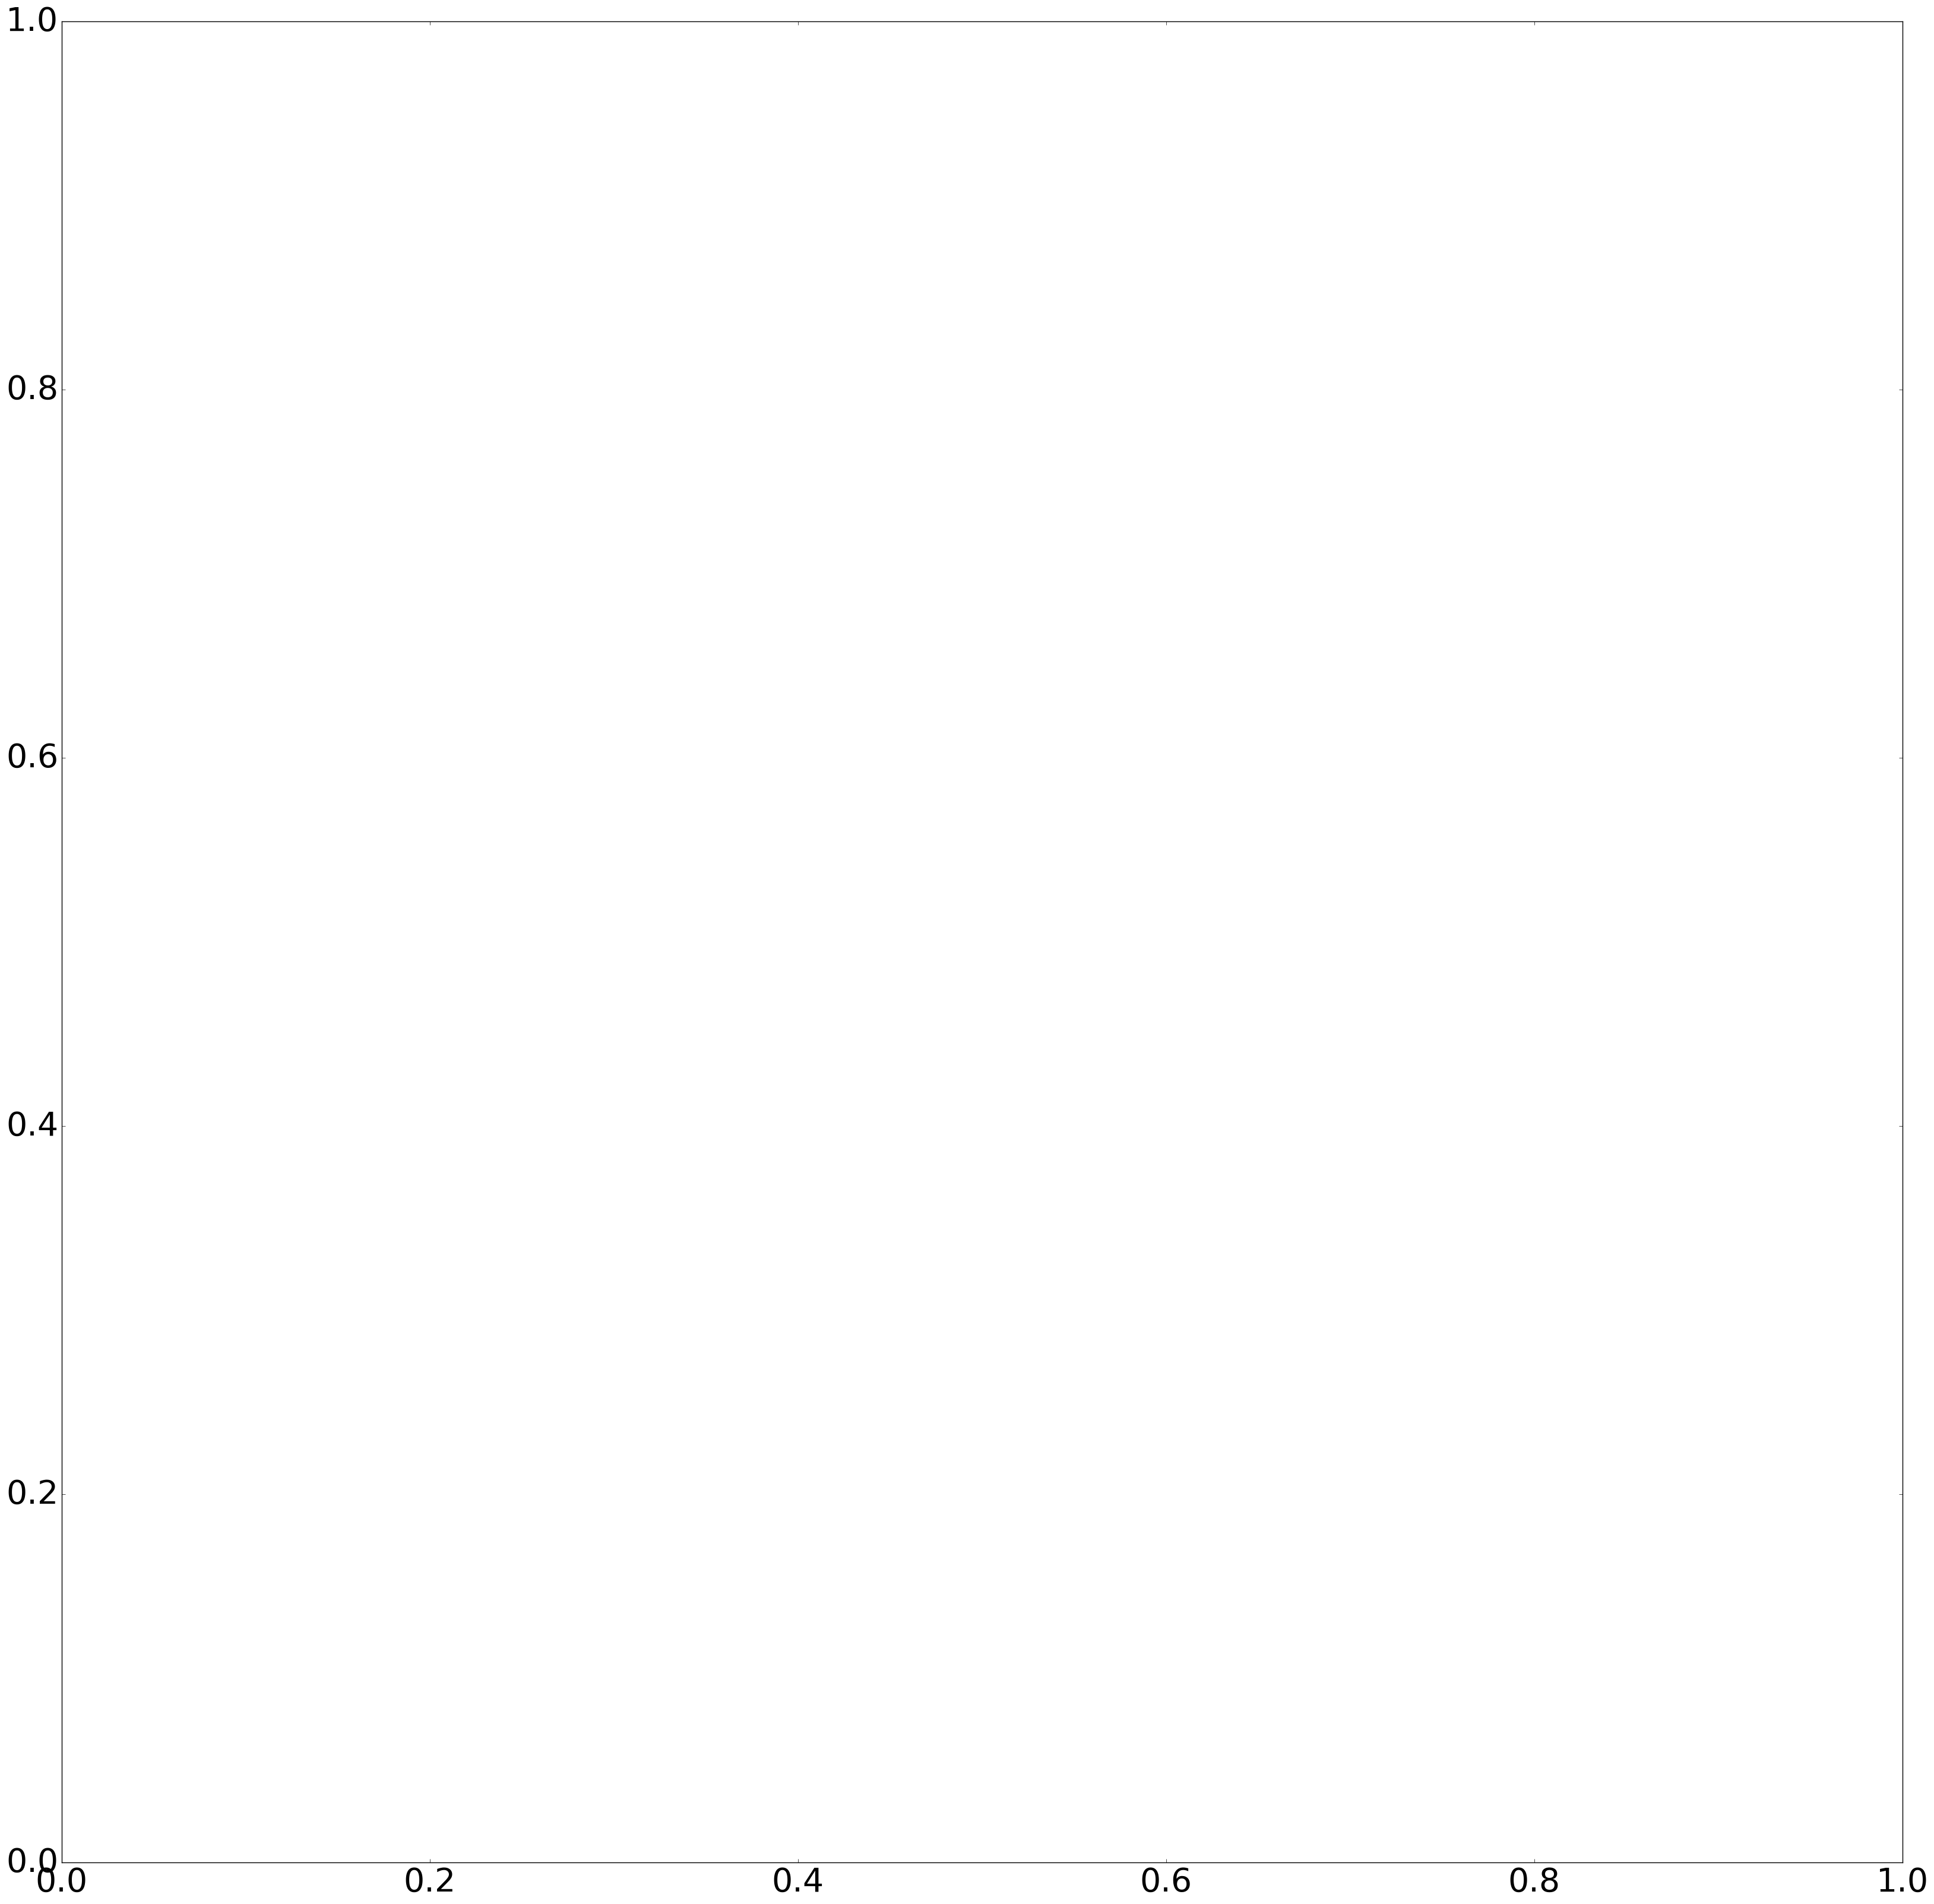

In [45]:
# fig mesh structure/constants

nplots = len(plots)

LIN = nplots // 2 + nplots % 2


fig, axs = plt.subplots(LIN,COL, figsize = (size,size))

canvas = fc(fig)

#         Station 15: Lat = 49.130412, Lon = -123.3114
#         Station 16: Lat = 49.1214, Lon = -123.317415

S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)




bathy = nc.Dataset("/home/gsgarbi/analysis-giorgio/sequential/bathy_meter_SalishSea2.nc")
model_lats = bathy.variables['nav_lat'][:]
model_lons = bathy.variables['nav_lon'][:]
depth = bathy.variables['Bathymetry'][:]



#End of spit
late = 49.205
lone = -123.26
#Further up spit
lats = 49.214
lons = -123.22


# In[ ]:

dx = 1.2
lat = late + dx * (late - lats)
lon = lone + dx * (lone - lons)
y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)
#print(depth[y, x])
#print(y, x)
#print('And in Fortran for ariane', y + 1, x + 1)
# point I used
outy = y - 1
outx = x - 1

deep = 110
shallow = 35

time0 = 0

time14 = 5

new_limx = (-124.5,-122.5)

new_limy = (48.7,49.5)



original_limx = (-123.5, -123.1)

original_ticksx = (-123.5, -123.3, -123.1)

original_limy = (49.05, 49.35)

original_ticksy = (49.1, 49.2, 49.3)

new_ticksx = (new_limx[0], float(sum(new_limx))/2, new_limx[1])

new_ticksy = (new_limy[0], float(sum(new_limy))/2, new_limy[1])
                   



#norm_p = mpl_colors.Normalize(vmin=deep, vmax=shallow)
norm_p = mpl_colors.Normalize(vmin=shallow, vmax=deep)
cmap_p = plt.cm.plasma_r

norm_w = None
cmap_w = "winter_r"

norm_p = mpl_colors.Normalize(vmin=time0, vmax=time14)
cmap_p = plt.cm.plasma_r


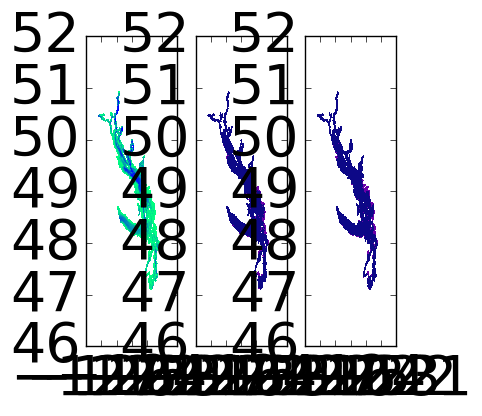

In [46]:

meshes = plt.figure(figsize=(4,4))

ax_w = meshes.add_subplot(131)

ax_p = meshes.add_subplot(132)

ax_t = meshes.add_subplot(133)




mesh_w = ax_w.pcolormesh(model_lons, model_lats, depth, cmap=cmap_w, norm = norm_w)
        
mesh_p = ax_p.pcolormesh(model_lons, model_lats, depth, cmap=cmap_p, norm = norm_p)

mesh_t = ax_t.pcolormesh(model_lons, model_lats, depth, cmap=cmap_p, norm = norm_p)

In [47]:
# what to plot, how many plots, how many particles, for how long?
# how many columns?
# create trajectories[], create axes parameters

j = 0
k= 0
LIN = nplots // 2 + nplots % 2

trajectories = []



initial_positions = []


trajectories1 =[]
init1 = []
for num in plots:
    trajectories1.append(np.loadtxt(directory+"run%s/traj.txt"%num, delimiter = ' '))
    init1.append(np.loadtxt(directory+"run%s/initial_positions.txt"%num))
    
    trajr = np.loadtxt(directory+"run%s/traj.txt"%num, delimiter = ' ')

l = 0
c= COL
for lin in range(LIN):
    trajectories.append(trajectories1[l:c])
    initial_positions.append(init1[l:c])
    l += 2
    c += 2
    


    
    points = [(x[1], x[2]) for x in trajectories[j][k]]

    particles = [x[0] for x in trajectories[j][k]]

#index is the time


#print (points)

mind = points[distance.cdist([S15], points).argmin()]

when15 = points.index(mind)

P = particles[when15]

print (particles[when15])
    
trajp =[]   
    

    
for i in range(int(len(trajectories[j][k]))):
    if trajectories[j][k][i][0] == P:
        trajp.append(trajectories[j][k][i])

trajp = trajp[:total]

print (trajr)




#results: PARTCLES, title                       

2.0
[[  1.00000000e+00  -1.23308070e+02   4.91902600e+01  -4.50410500e+01
    0.00000000e+00]
 [  1.00000000e+00  -1.23308460e+02   4.91896800e+01  -4.57209800e+01
    9.90000000e-04]
 [  1.00000000e+00  -1.23308820e+02   4.91892900e+01  -4.63222600e+01
    1.98000000e-03]
 ..., 
 [  1.20000000e+01  -1.23657520e+02   4.92742300e+01  -6.64072100e+01
    9.63290000e-01]
 [  1.20000000e+01  -1.23660020e+02   4.92758500e+01  -6.69848800e+01
    9.64290000e-01]
 [  1.20000000e+01  -1.23662290e+02   4.92774000e+01  -6.71284600e+01
    9.65280000e-01]]


In [48]:

titles = []

time_0 = date_0 + dt.timedelta(hours = int(P))
length = length
depth_0 = -int(trajp[0][3])

ftitle = (time_0, length, depth_0)
        
        
title = "INITIAL TIME: {} ; RUN LENGTH: {} ; INITIAL DEPTHS(m): {} ".format(time_0, length, depth_0)
        

print (title)


INITIAL TIME: 2016-07-19 02:00:00 ; RUN LENGTH: 5 days ; INITIAL DEPTHS(m): 59 


In [49]:
# fig = plt.figure(figsize = (size, size))


# top = 0.95

# vert = 0.07

# rig = 0.1

# hei = 0.03

# wid = 1.5



# part = fig.add_axes((rig,top,wid,hei))
# norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
# cb1 = mpl_colorbar.ColorbarBase(part, cmap=cmap, norm=norm,  orientation = "horizontal")
# cb1.set_label('Particle Depth (m)', fontsize = 50)

# particlecb = fig

# fig = plt.figure(figsize = (size, size))

# water = fig.add_axes((rig,top,wid,hei))
# cb_mesh = fig.colorbar(mesh, water, orientation = "horizontal" )
# cb_mesh.set_label("Water Depth (m)", fontsize = 50)

# watercb = fig

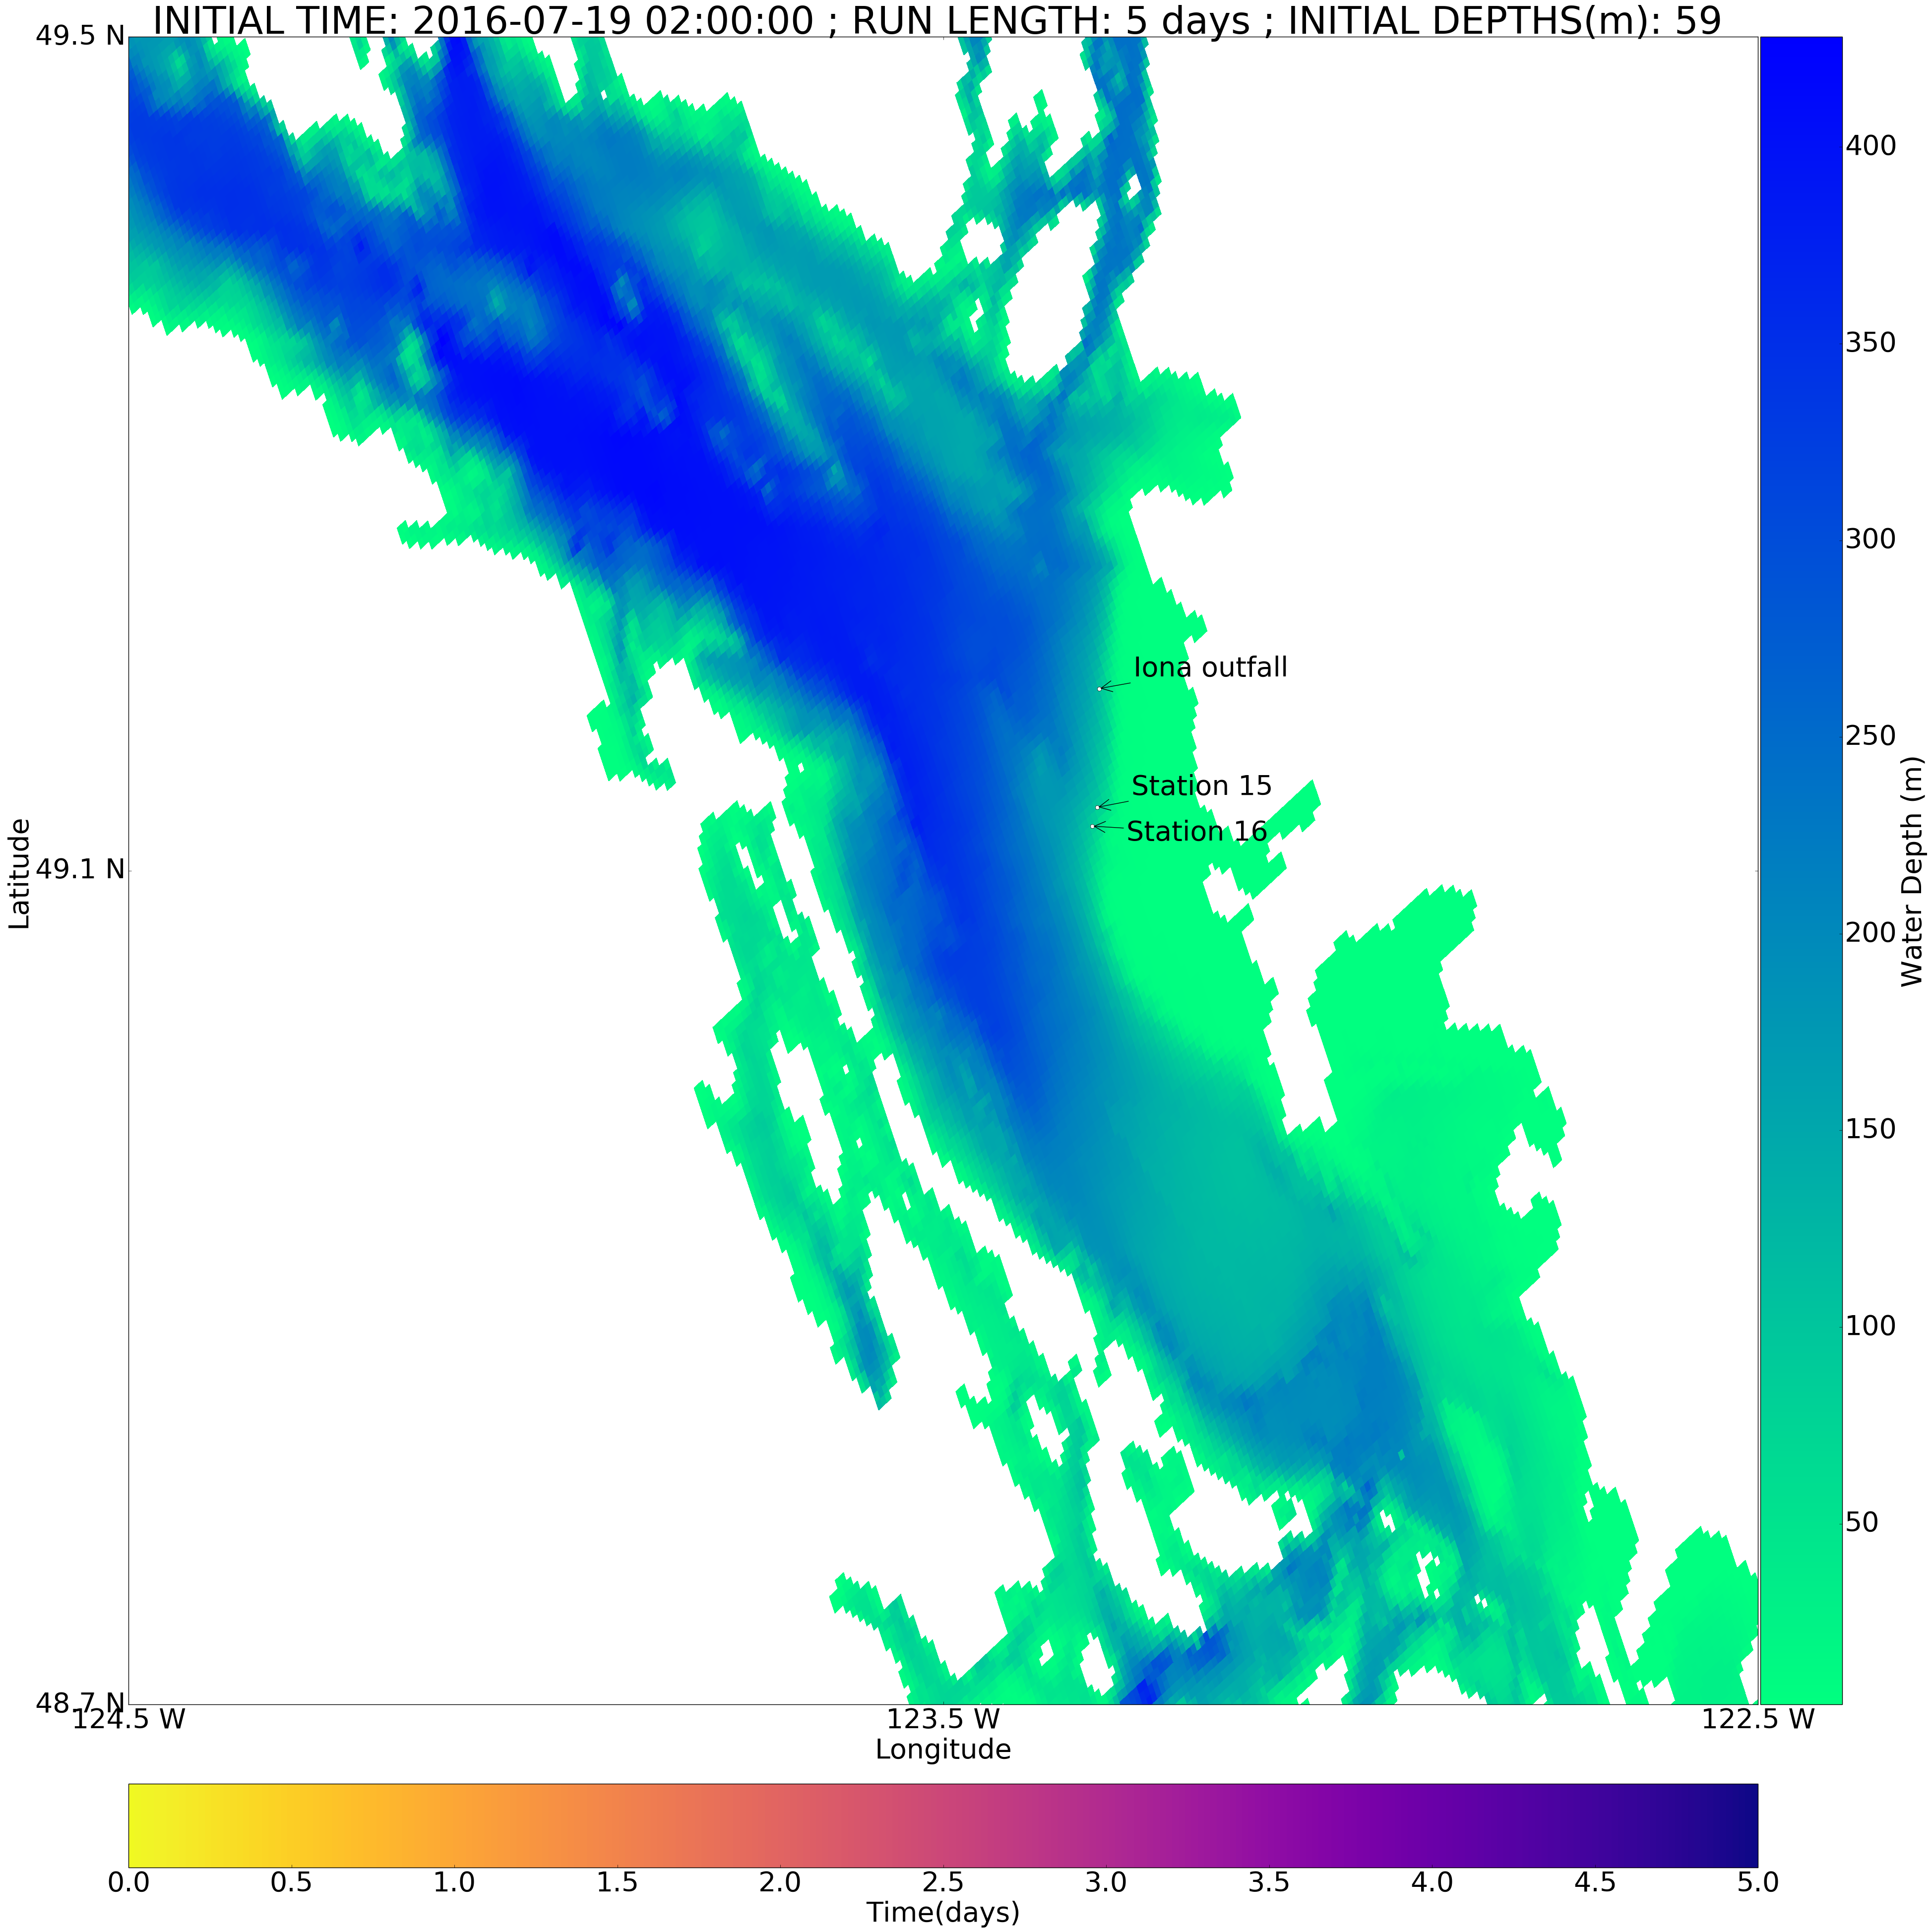

In [50]:
fig, axs = plt.subplots(LIN,COL, figsize = (size,size))

axs=np.reshape(axs,(1,1))



for j in range(LIN):
    for k in range (COL):
        
        divider = make_axes_locatable(axs[j,k])
        
        cax_w = divider.append_axes("right", size="5%", pad=0.05)
        
        cax_p = divider.append_axes("bottom", size="5%", pad=1.6)
        
        
        cb_w = fig.colorbar(mesh_w, cax = cax_w)
        
        cb_p = fig.colorbar(mesh_p, cax = cax_p, orientation = "horizontal")
        
        cb_w.set_label("Water Depth (m)")
        
        cb_p.set_label("Time(days)")




        mesh_w = axs[j,k].pcolormesh(model_lons, model_lats, depth, cmap=cmap_w)


        
        

        pos = COL*j+k
        
        axs[j,k].set_title(title, fontsize = tfs)

            
        
        

        

        axs[j,k].set_xlim(new_limx)
        axs[j,k].set_xticks(new_ticksx)
        axs[j,k].set_xticklabels(('%s W' %-new_limx[0], '%s W' %-round(float(sum(new_limx))/2,2), '%s W' %-new_limx[1]))
        axs[j,k].set_xlabel('Longitude')
        
        axs[j,k].set_ylim(new_limy)
        axs[j,k].set_yticks(new_ticksy)
        axs[j,k].set_yticklabels(('%s N' %new_limy[0], '%s N' %round(float(sum(new_limy))/2,1), '%s N' %new_limy[1]))
        axs[j,k].set_ylabel('Latitude')
        
        
        #Iona
        axs[j,k].plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
        #New Stations

        axs[j,k].plot(S15[0],S15[1], 'wo')
        
        axs[j,k].plot(S16[0],S16[1], 'wo')
        
        axs[j,k].annotate(
        "Iona outfall",
        xy=(model_lons[outy, outx], model_lats[outy, outx]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
        axs[j,k].annotate(
        "Station 15",
        xy=(S15[0],S15[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

        axs[j,k].annotate(
        "Station 16",
        xy=(S16[0],S16[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='top',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    


plt.tight_layout()



In [51]:
south = []
for j in range(LIN):
    for k in range(COL):
            for i in range(len(trajectories[j][k])):
                if trajectories[j][k][i][2] < 50:
                    if trajectories[j][k][i][0] not in south:
                        south.append(trajectories[j][k][i][0])

        


In [52]:
end = len(trajp)


for j in range(LIN):
    for k in range (COL):


            
        
            for t in range(len(trajp)):
                scaled_t = 1-(end - t)/ end
                cmap = plt.cm.plasma_r
                color = cmap(scaled_t)
                axs[j,k].scatter(trajp[t][1], trajp[t][2], c = color, edgecolor = "none")
                


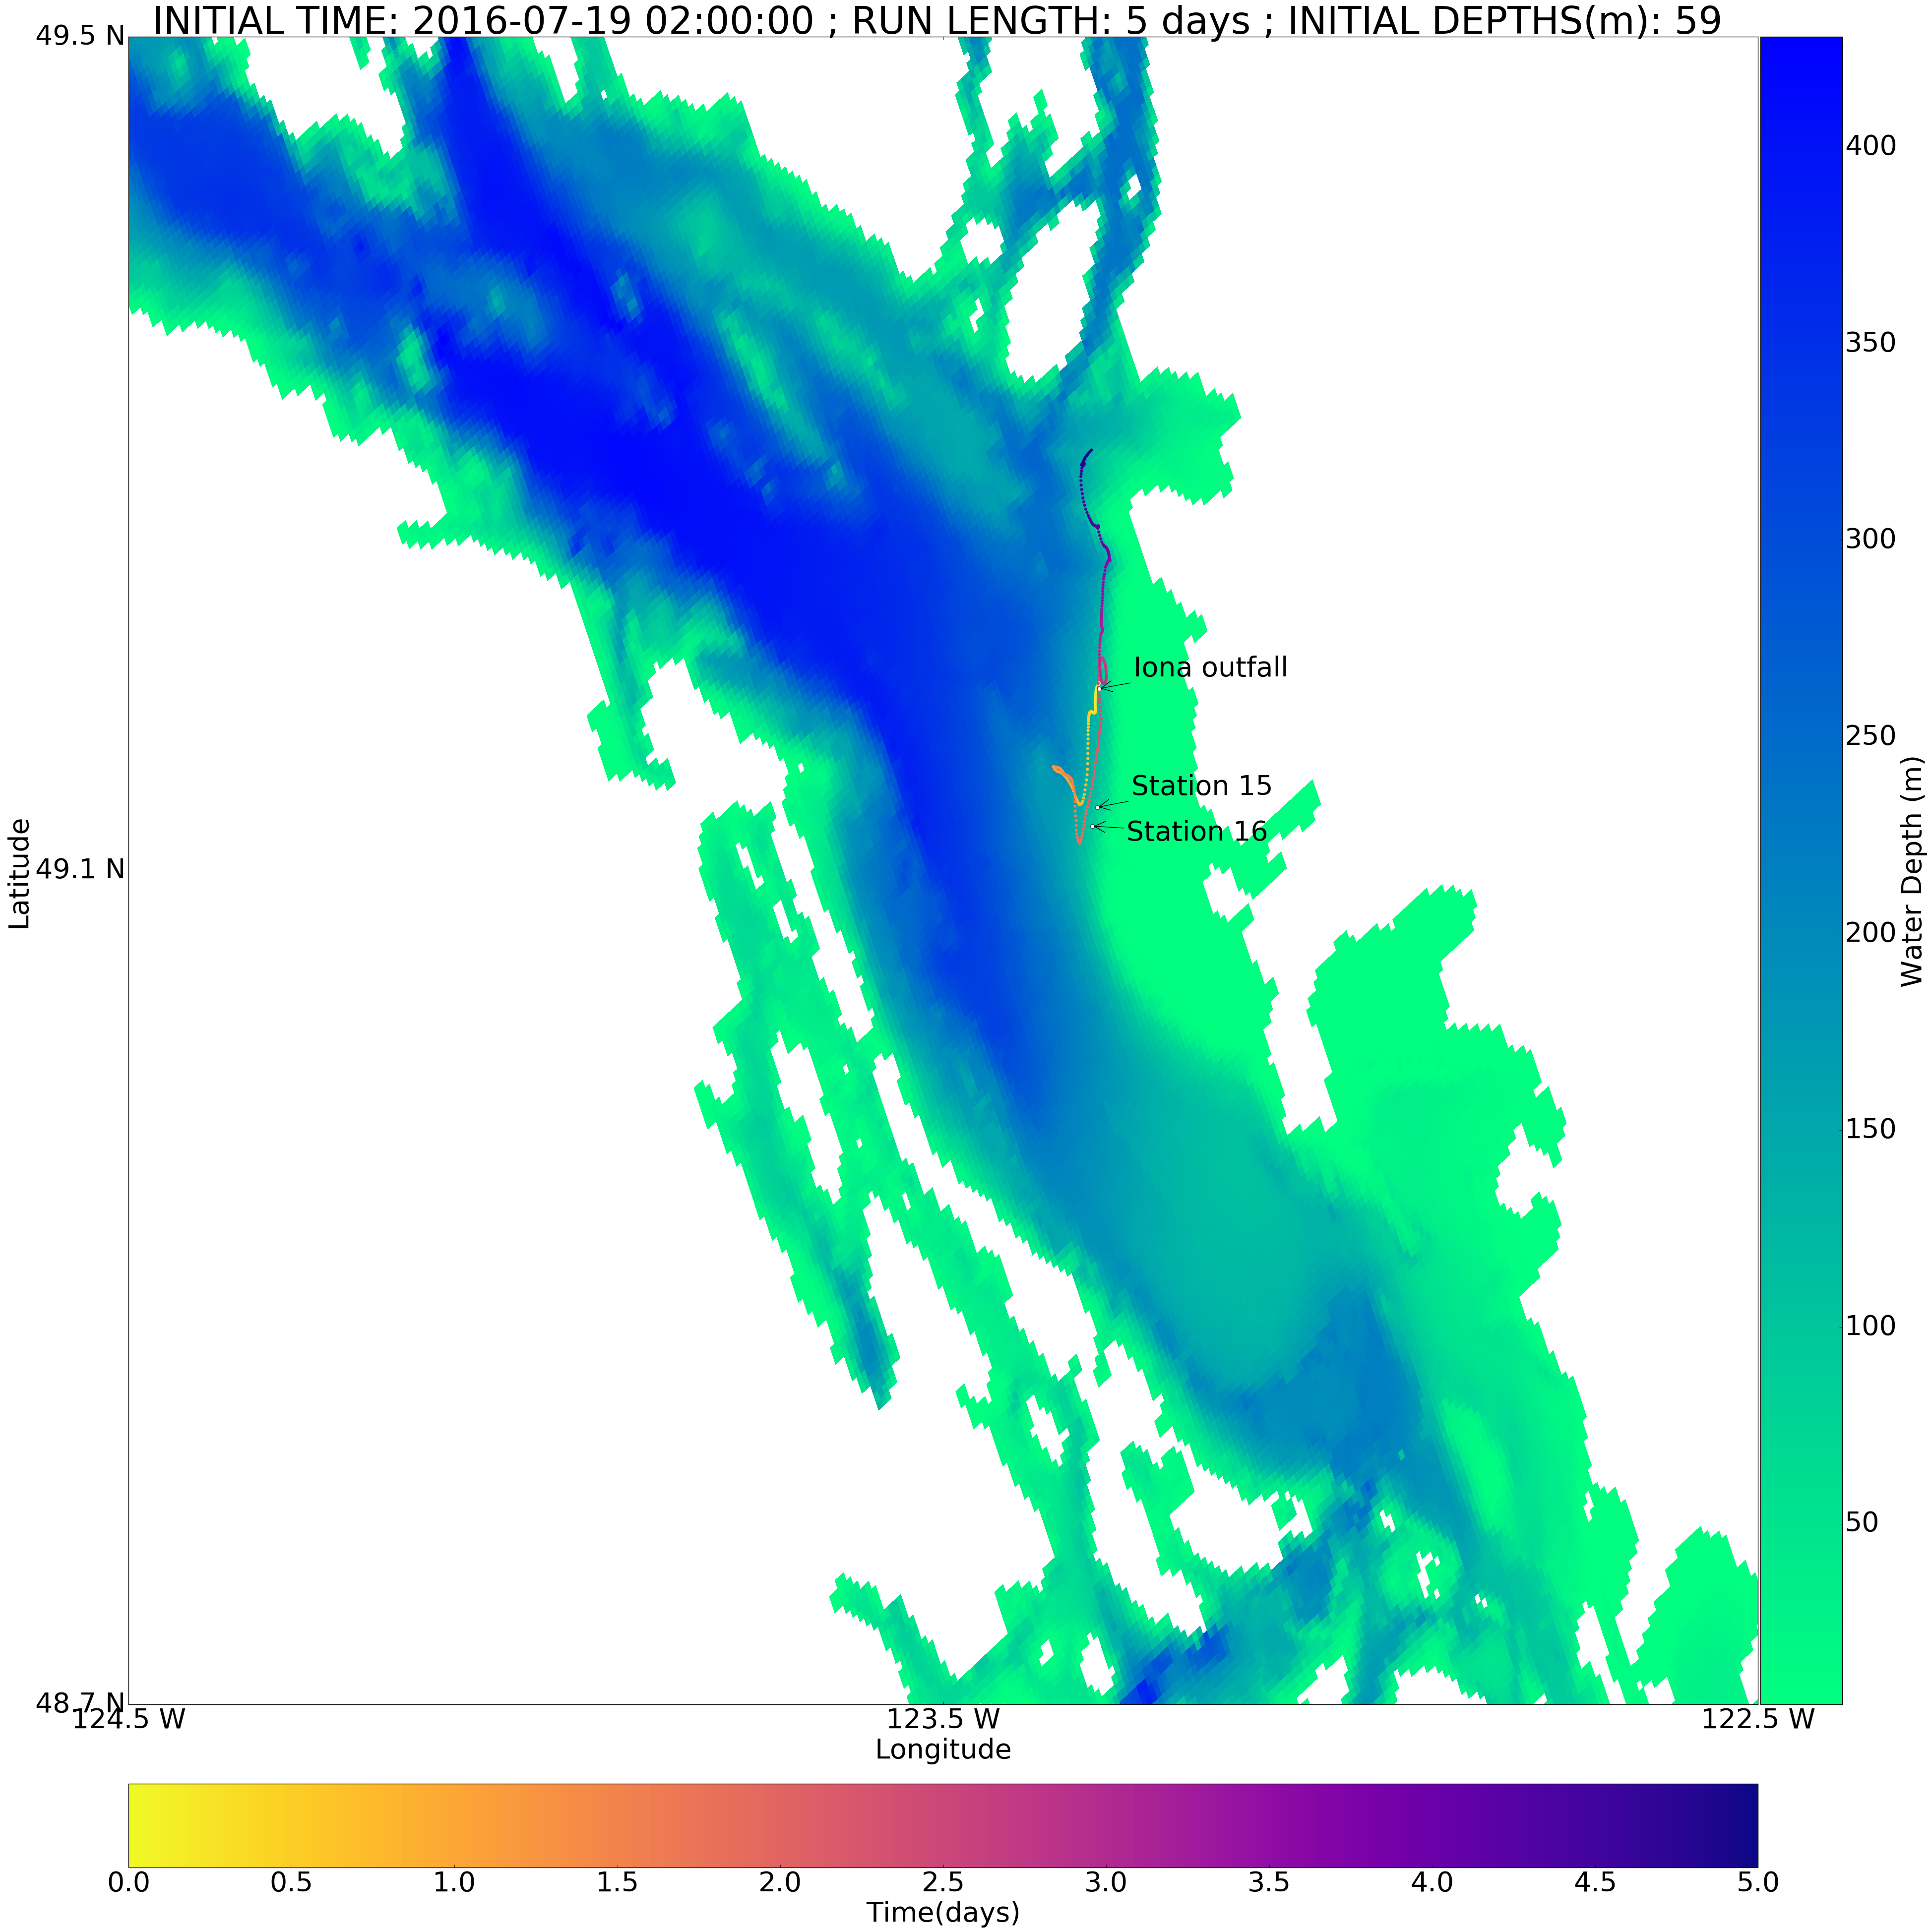

In [53]:
fig

In [54]:
# south = []
# closel = []  

# for j in range(LIN):
#     for k in range(COL):
#             for i in range(len(trajectories[j][k])):
#                 if trajectories[j][k][i][2] < 49.1:
#                     if trajectories[j][k][i][0] not in south:
#                         south.append(trajectories[j][k][i][0])
                
#                 p2 = (trajectories[j][k][i][1], trajectories[j][k][i][2])
                
#                 if close(euclidean_d(p2, S15)):
#                     closel.append(trajectories[j][k][i])
            

# south = [2]

# for m in south:
#     print ("Particle %s is moving south" %int(m))
    
# for m in closel:
#     print (m)
              

# trajp = []


# for i in range(int(len(trajectories[j][k]))):
#     if trajectories[j][k][i][0] == 2:
#         trajp.append(trajectories[j][k][i])

# trajp = trajp[:int(len(trajp)*ratio)]




# trajp = trajp[:int(len(trajp)*ratio)]



In [55]:
# #choose when15, 16in the chosen trajectory

# points = [(x[1], x[2]) for x in trajp]

# particles = [x[0] for x in trajp]

# #index is the time


# #print (points)

# mind = points[distance.cdist([S15], points).argmin()]

# when15a = points.index(mind)

# when15b = otraj.time(otraj.closest_p(S15))

# when15c = otraj.timec(S15)




# points = [(x[1], x[2]) for x in trajp]

# particles = [x[0] for x in trajp]

# #index is the time


# #print (points)

# mind = points[distance.cdist([S16], points).argmin()]

# when16 = points.index(mind)

# print (td15, when15b, when15c)


In [129]:


otraj = Traj(traject = trajr)

straj = otraj.sub_traj(2)





xy=(-124.49,48.71)

axs[j,k].annotate(
            "closest point to S15 on {} \n".format(straj.timec(S15)) +
            "closest point to S16 on {}".format(straj.timec(S16)),
            xy=xy, xytext=(50, 10),
            textcoords='offset points')

print (straj.timec(S15))

2016-07-20 23:40:00


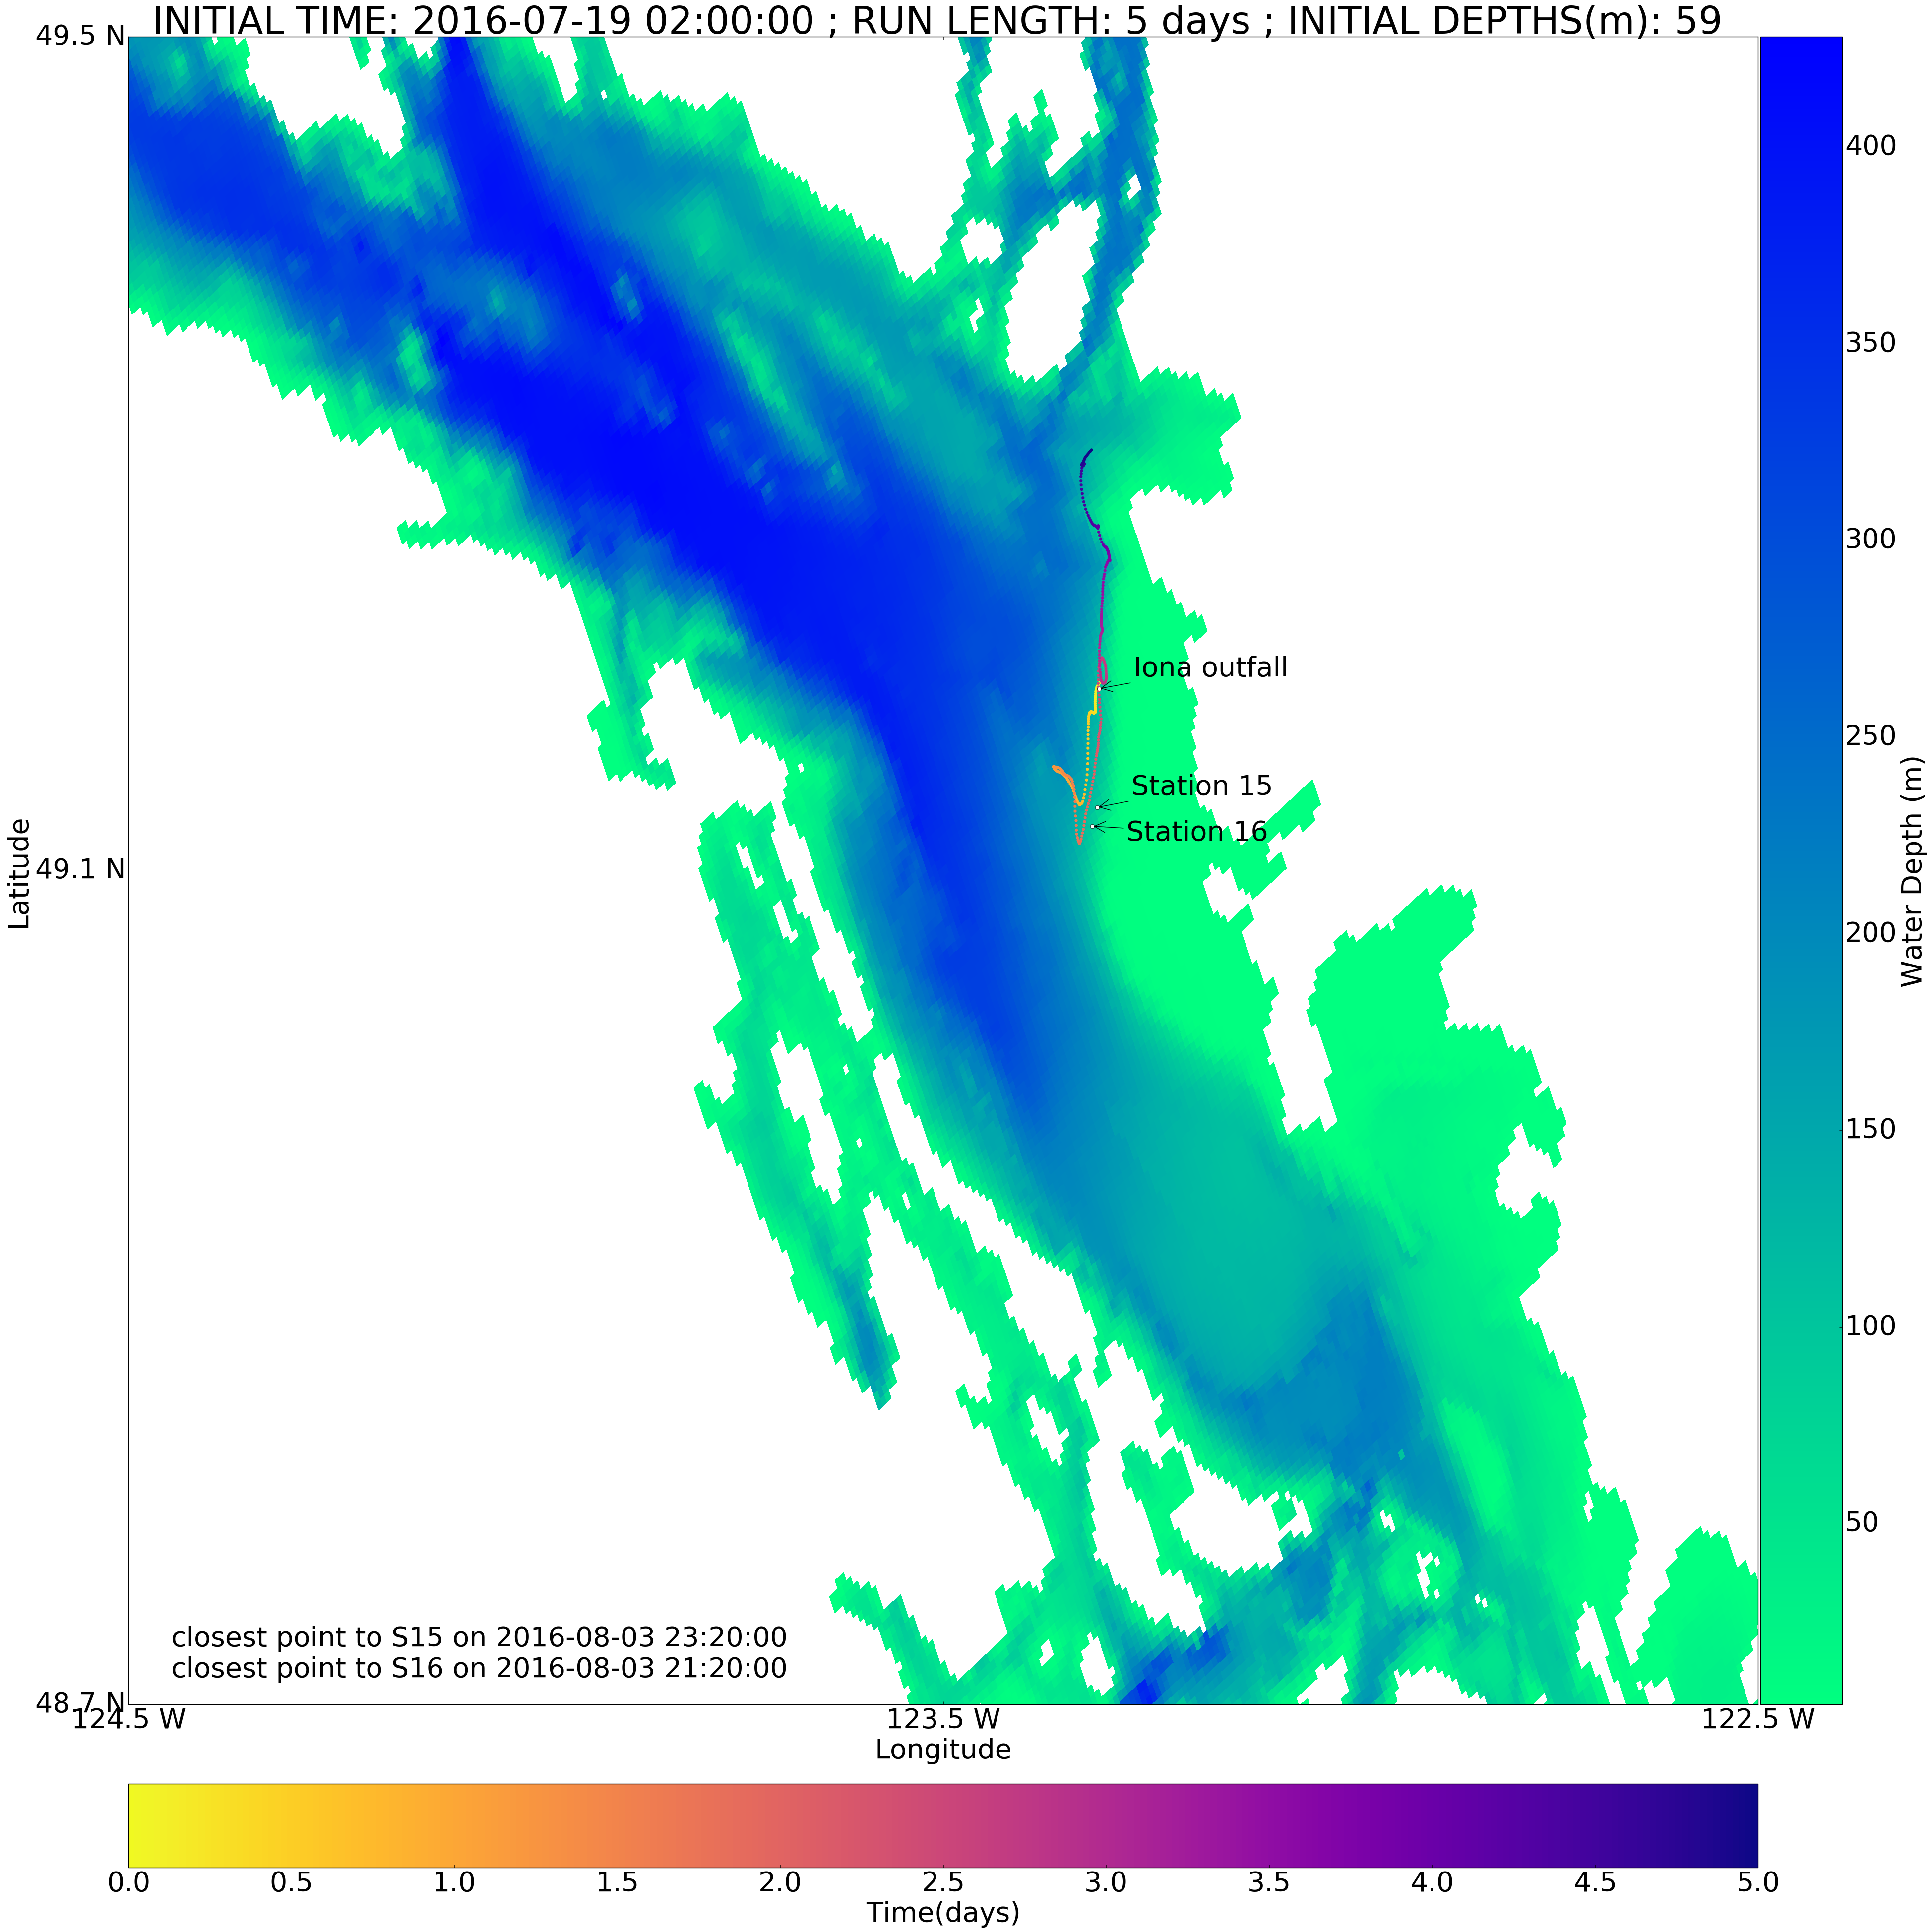

In [59]:
fig